In [ ]:
import os
os.getcwd()
os.chdir("..")

In [19]:
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datasets import loaders_ecg

Define the configuration to be used:

In [20]:
data_sources = ["time_diffusion", "time_vqvae", "diffwave"]
configurations = []
for source in data_sources:
    configurations.append(
         {
        "sample_frequency": 100,
        "generative_model": source
    }
    )
data_sources.append("real")
num_channels = 12

artifacts_path = Path("../artifacts/ecg/plots/exploratory")

Load data:

In [23]:
os.chdir("src")
datasets = []
for config in configurations:
    datasets.append(
        loaders_ecg.PTBXLSyntheticRhythm(
            sample_frequency=config["sample_frequency"],
            generative_model=config["generative_model"],
            split = "train"
        )
    )
datasets.append(loaders_ecg.PTBXLRhythm(
    sample_frequency=config["sample_frequency"],
    split="train"
)
)

/home/jam/PycharmProjects/ai4ha-eeg-ecg/src/datasets/loaders_ecg.py:469: DtypeWarning: Columns (14,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(
/home/jam/PycharmProjects/ai4ha-eeg-ecg/src/datasets/loaders_ecg.py:477: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  na_idx = data.loc[pd.isna(data).any(1), :].index


In [24]:
for dataset, source in zip(datasets, data_sources):
    num_classes = len(dataset.classes.unique(return_counts=True)[0])    


In [27]:
data_sources

['time_diffusion', 'time_vqvae', 'diffwave', 'real']

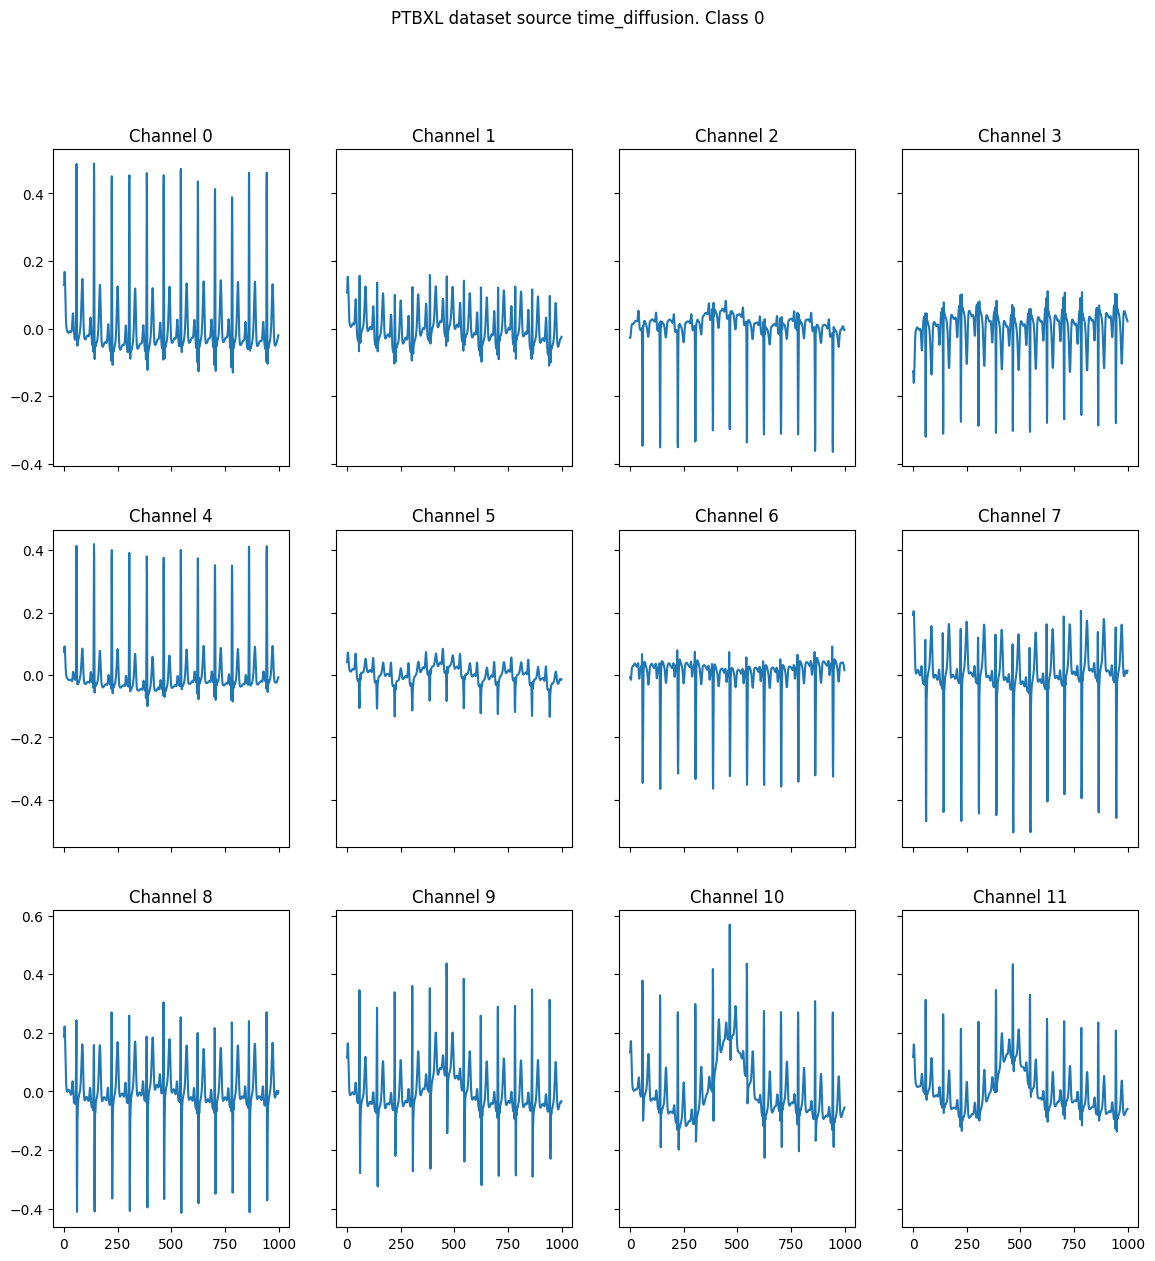

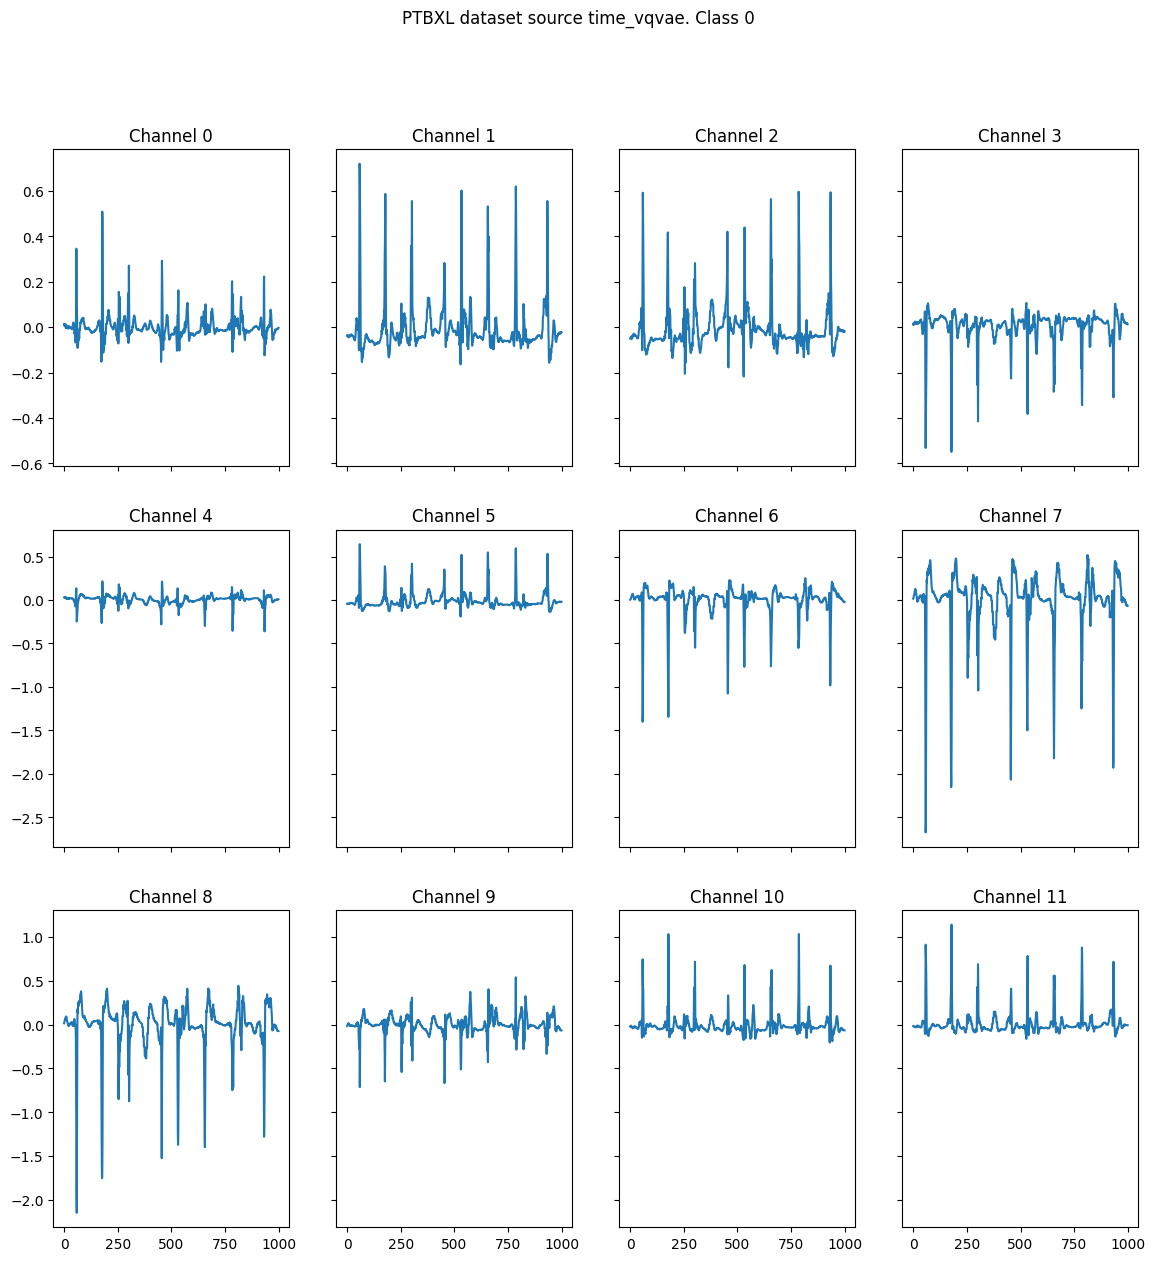

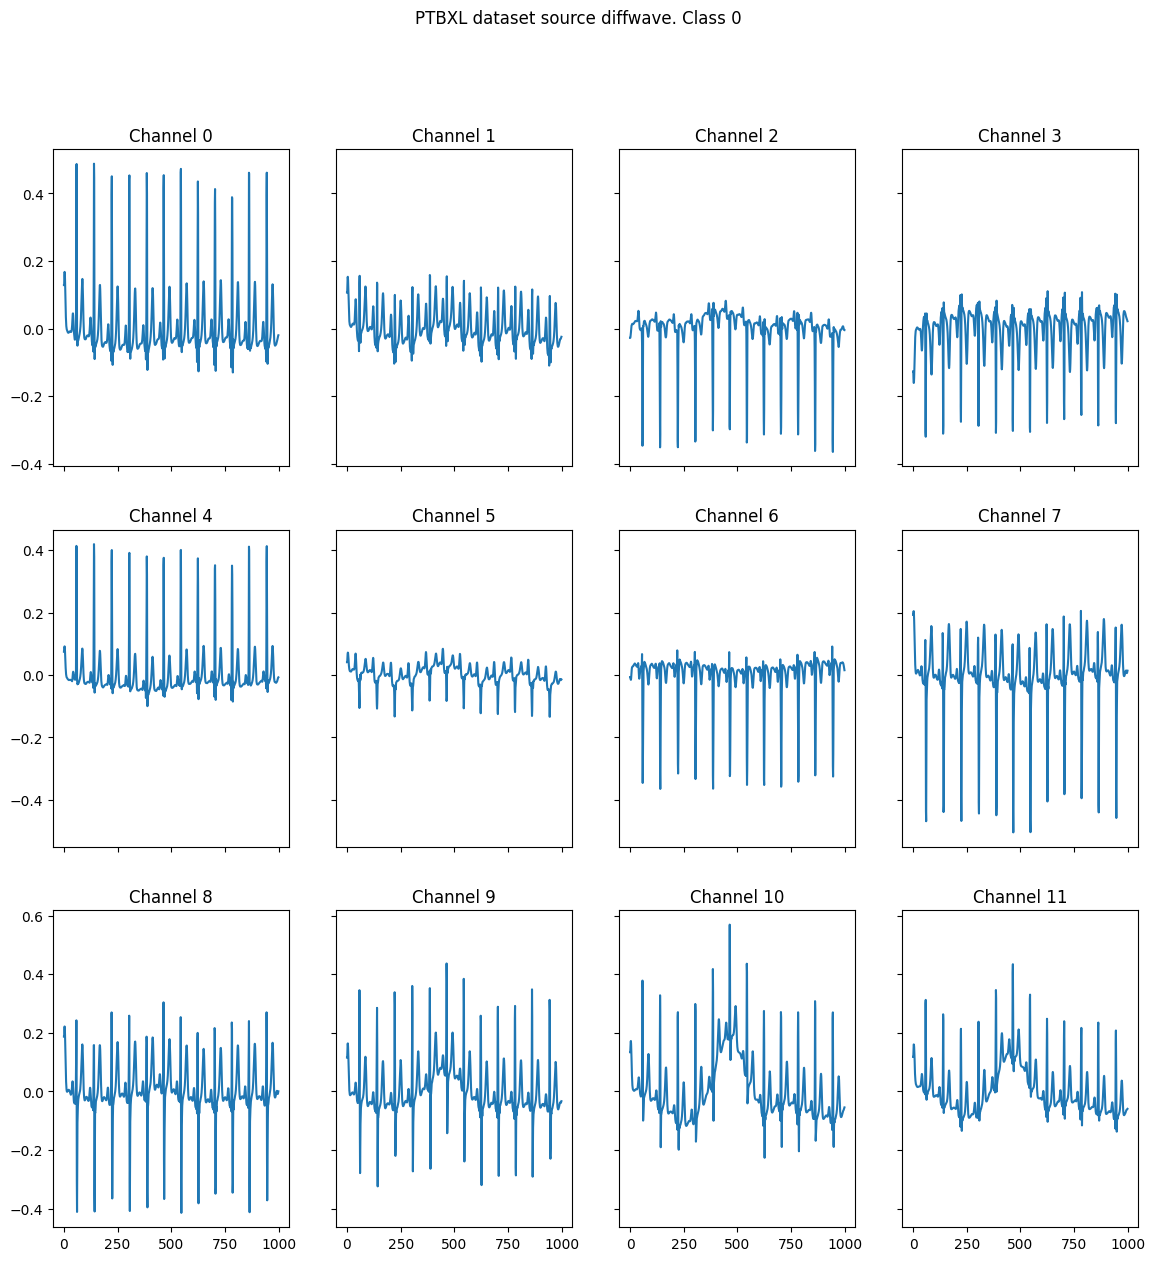

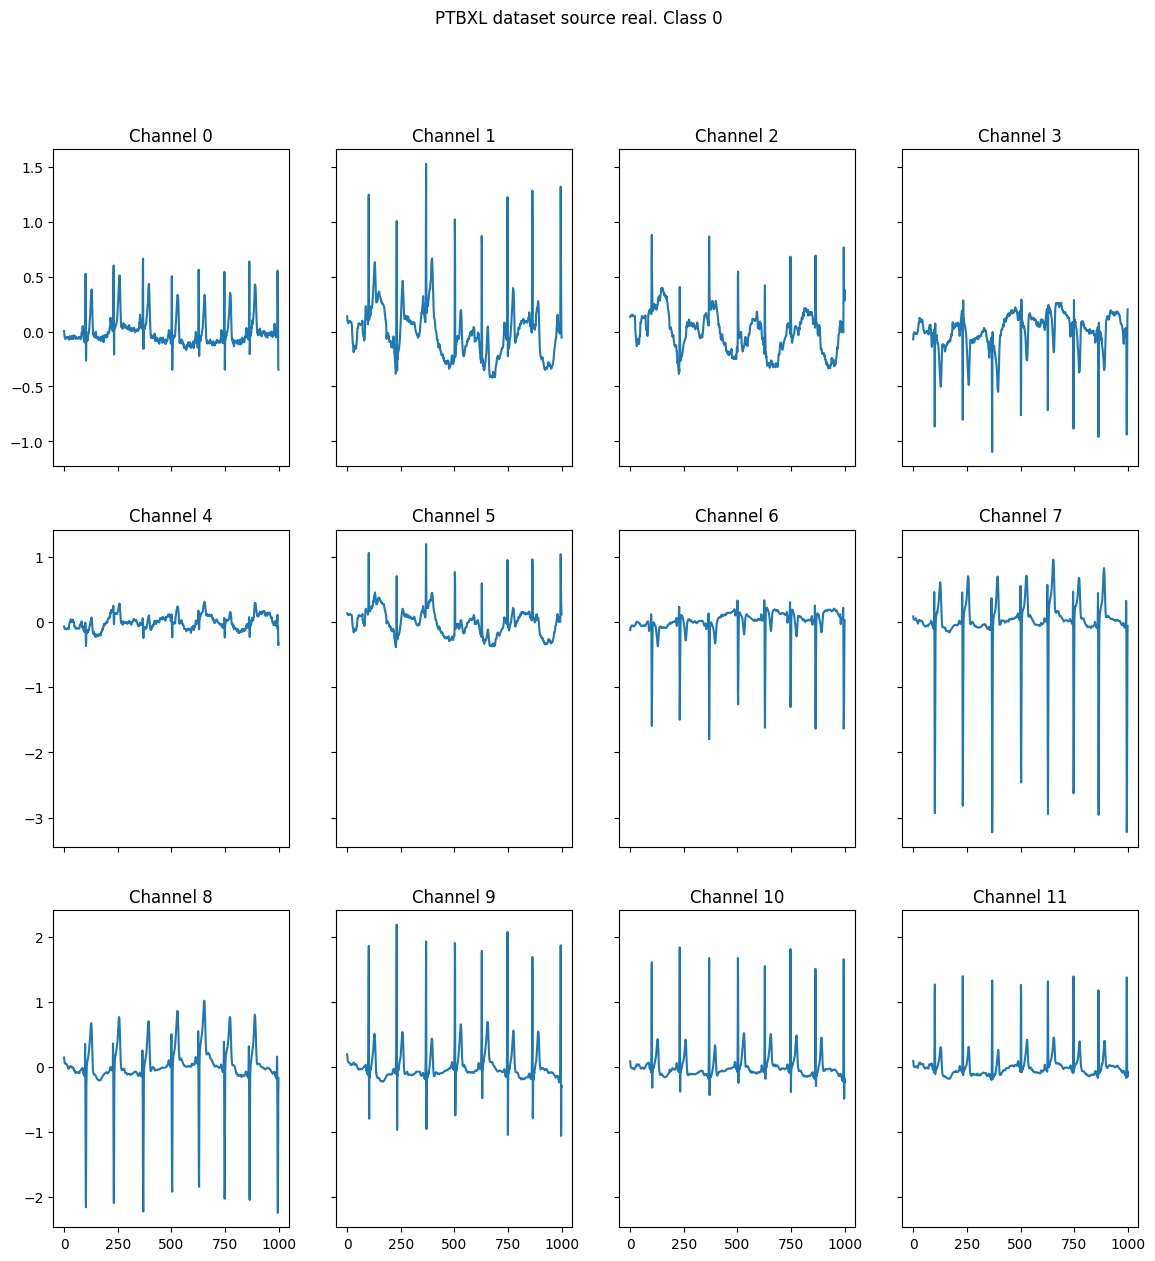

In [29]:
for nc in range(num_classes):    
    for dataset, source in zip(datasets, data_sources):
        fig, ax = plt.subplots(3, 4, sharex="col", sharey="row", figsize=(14,14))
        ax = ax.ravel()
        for i in range(num_channels):
            ax[i].plot(dataset.features[np.where(dataset.classes==nc)[0][0]][i])
            ax[i].set_title(f"Channel {i}")
        plt.suptitle(f"PTBXL dataset source {source}. Class {nc}")
        plt.savefig(artifacts_path / f"{source}_class_{nc}.png")
        plt.show()
    break
        
        

torch.Size([1, 12, 1000])